In [15]:
import numpy as np
#read pic turn gray
import cv2 
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv('all_data_info.csv', header=None)

In [24]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)


In [ ]:
imgs = []
for i in x_train:
    img = cv2.imread('imgs/{}'.format(i)) 
    img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    new = img[0:99, 0:92]
    imgs.append(new)
    plt.imshow(new, cmap='gray')

In [80]:
def Gabor_filter(k_size = 111, sigma = 10, gamma = 1.2, Lambda = 10, psi = 0, angle = 0):
    mid = k_size // 2 # Kernel 中心點
    gabor = np.zeros((k_size, k_size), dtype = np.float32) #建立空的kernel
    
    for y in range(k_size):
        for x in range(k_size):
            px = x - mid
            py = y - mid
            
            theta = angle * np.pi / 180.
            
            x_1 = np.cos(theta) * px + np.sin(theta) * py
            y_1 = -np.sin(theta) * px + np.cos(theta) * py
            
            term_1 = np.exp(-(x_1**2 + gamma**2 * y_1**2) / (2 * sigma**2))
            term_2 = np.cos(2 * np.pi*x_1/Lambda + psi)
            gabor[y, x] = term_1 * term_2
    
    gabor = gabor / np.sum(np.abs(gabor))
    return gabor

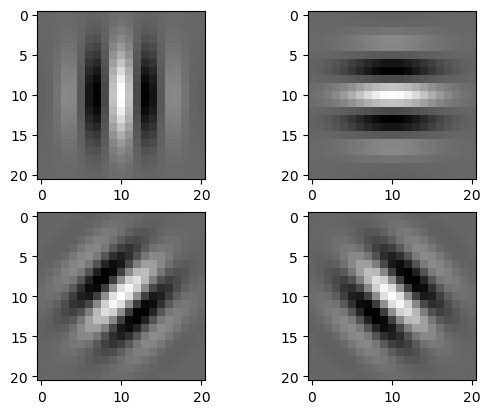

In [99]:
kernel_1 = Gabor_filter(k_size = 21, sigma = 4, gamma = 1.0, Lambda = 7., angle = 0)
kernel_2 = Gabor_filter(k_size = 21, sigma = 4, gamma = 1.0, Lambda = 7., angle = 90)
kernel_3 = Gabor_filter(k_size = 21, sigma = 4, gamma = 1.0, Lambda = 7., angle = 45)
kernel_4 = Gabor_filter(k_size = 21, sigma = 4, gamma = 1.0, Lambda = 7., angle = 135)

plt.figure()
plt.subplot(221)
plt.imshow(kernel_1, cmap='gray')
plt.subplot(222)
plt.imshow(kernel_2, cmap='gray')
plt.subplot(223)
plt.imshow(kernel_3, cmap='gray')
plt.subplot(224)
plt.imshow(kernel_4, cmap='gray')